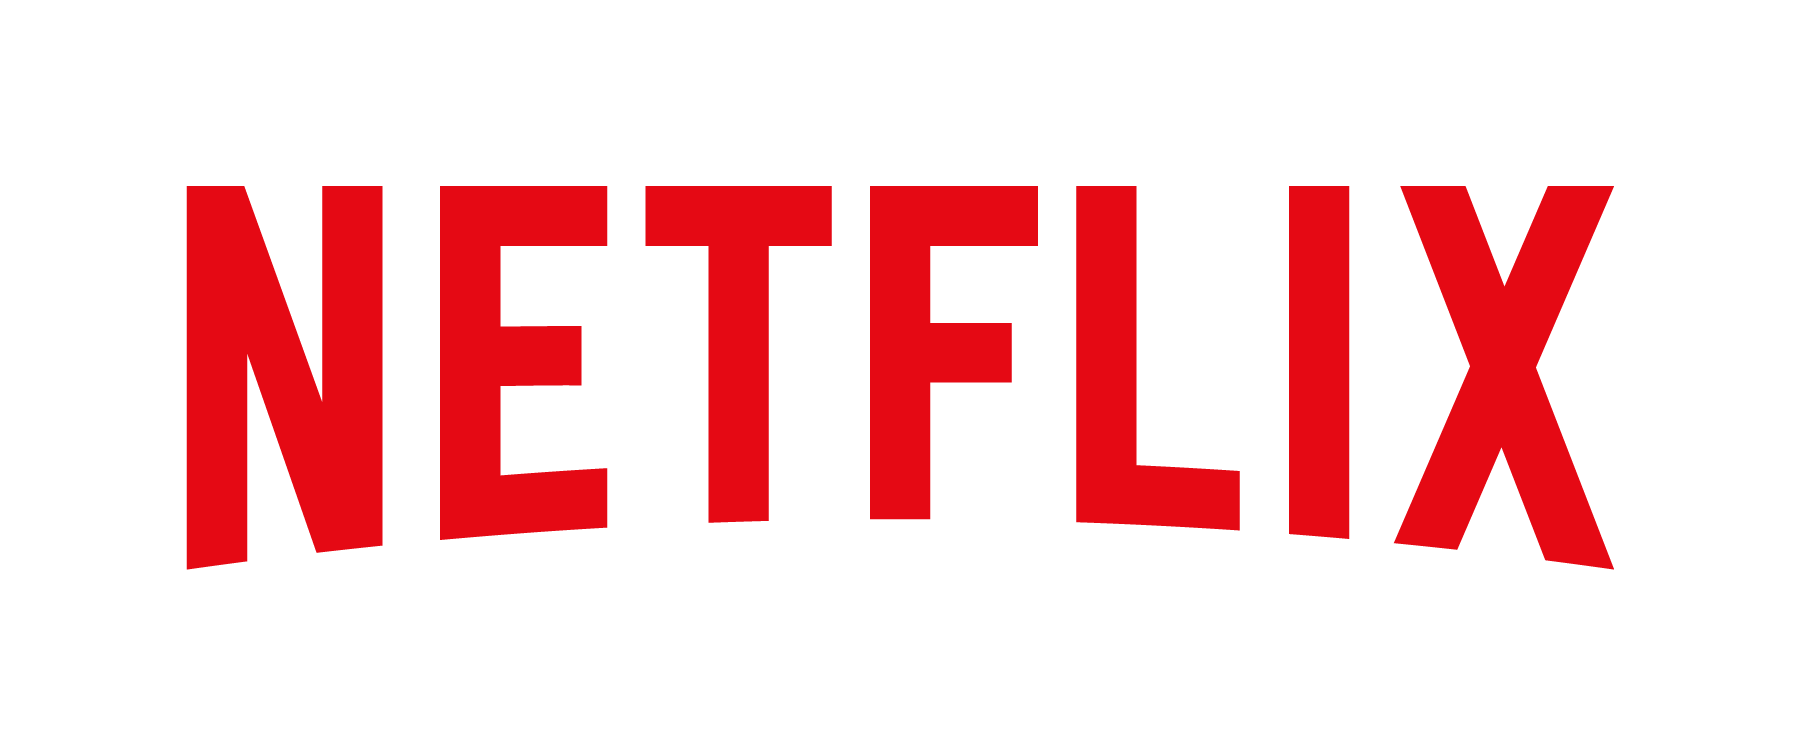

<h1 style="text-align:center;" >Netflix Shows Exploratory Data Analysis</h1>

## Table of contents
* [Introduction](#introduction)
* [Data](#data)
* [Type](#type)
* [Director](#director)
* [Cast](#cast)
* [Country](#country)
* [Date](#date)
* [Ratings](#ratings)
* [Duration](#duration)
* [Genre](#genre)
* [Description](#description)

## Introduction <a name="introduction"></a>

In this notebook, I will examine the dataset consisting of Movies and TV Shows on Netflix. Afterwards, I will visualize the data that I have obtained from these reviews and that I consider important. I wrote some questions to demonstrate this in a simpler way. In my study, I will try to answer the questions I wrote below with the analyzes I have made. Finally, I think I should point out that I separated Movies and TV Shows while doing my analysis. I thought this method would be more useful and meaningful since they are two different branches.

* What is the distribution of Movies and TV Shows on Netflix ?
* Who are the most popular directors in Movies and TV Shows on Netflix ?
* Who are the most popular actors in Movies and TV Shows on Netflix ?
* Which countries have the most Movies and TV Shows on netflix ?
* What is the most popular genre in the countries with the most Movies and TV Shows on Netflix ?
* What is the average duration in countries with the most Movies and TV Shows on Netflix ?
* What is the date distribution of movies and TV shows on Netflix ?
* What is the most popular genre in Movies and TV Shows on Netflix ?
* What is the rating percentage of Movies and TV Shows on Netflix ?
* What is the duration distribution of Movies and TV Shows on Netflix ?

## Data <a name="data"></a>

To briefly talk about the dataset, the dataset consists of Movies and TV Shows available on Netflix. The dataset contains a lot of data on Movies and TV Shows. The description of these data is as follows.

* show_id      : Unique ID for every Movie / Tv Show
* type         : Identifier - A Movie or TV Show
* title        : Title of the Movie / Tv Show
* director     : Director of the Movie
* cast         : Actors involved in the movie / show
* country      : Country where the movie / show was produced
* date_added   : Date it was added on Netflix
* release_year : Actual Release year of the move / show
* rating       : TV Rating of the movie / show
* duration     : Total Duration - in minutes or number of seasons
* listed_in    : Genre
* description  : The summary description


#### Firstly let's  import the necessary packages that we will use.

In [ ]:
import collections
import itertools
import numpy as np 
import pandas as pd 
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.io as pio
import matplotlib.pyplot as plt
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#### Let's load and analyze the data

In [ ]:
df = pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')

In [ ]:
fig = go.Figure(data=[go.Table(
    header=dict(values=list(df.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[df.show_id, df.type, df.title, df.director,
                       df.cast, df.country, df.date_added, df.release_year,
                       df.rating, df.duration, df.listed_in, df.description],
               fill_color='lavender',
               align='left'))
])

fig.show()

Before starting the analysis, we need to see the data types and missing data in the dataframe we created. The reason for this is to check if any changes need to be made. Let's examine the dataframe to see the names and types of the columns and the missing data.

In [ ]:
df.info()

In [ ]:
df.isnull().sum(axis = 0)

Let's start with data types first. Here, date_added and duration data types appear as objects. We need to perform operations or calculations on this data. That's why we're going to make these changes in the next sections. I think it would be more beneficial to make the changes in the analysis section. 

Now we need to look at the missing data. As seen in the table above, there are many missing data in the director, cast, country, date_added and rating columns. These missing data will of course affect our analysis. To minimize this, we need to make some changes. We can replace missing data with an average value or the most frequently found values. However, these operations may adversely affect the analyzes we perform on the original data. So here we first mark the missing data. Then, while we review the analysis results, we also point out the missing data. I think that analysis will be more meaningful in this way.

In [ ]:
df.fillna("Unknown", inplace = True)
df.isnull().sum(axis = 0)

#### Let's see what we can learn with describe

In [ ]:
df[df[:] != 'Unknown'].describe(include = "all")

## Type <a name="type"></a>

#### What is the distribution of Movies and TV Shows on Netflix ?

In [ ]:
value = df['type'].value_counts()
name = df['type'].value_counts().index

fig = px.pie(df, values= value, names= name,
             color=name, color_discrete_map={'TV Show':'royalblue', 'Movie':'darkblue'})
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title_text='Percentage of Movies and TV shows', title_x=0.5)
fig.show()

As can be seen, there are 2410 TV Shows and 5377 movies in the data set. Their percentages are 30.9% and 69.1%, respectively. I'm a bit surprised that there are more movies on Netfix than TV Shows. And if we just make a comment on the data we have, we can say that people prefer movies more or movies are more profitable for Netflix.

#### Two separate dataframes are created to work on Movies and TV Shows separately.

In [ ]:
movies_df = df[df['type'] == 'Movie']
tvshows_df = df[df['type'] == 'TV Show']

## Director <a name="director"></a>

#### Who are the most popular directors in Movies and TV Shows on Netflix ?

In [ ]:
temp = movies_df[movies_df['director'] != 'Unknown'].copy()

director = collections.Counter(itertools.chain.from_iterable(v.split(',') for v in temp['director']))
director_m_df = pd.DataFrame.from_dict(director, orient='index').reset_index()
director_m_df = director_m_df.rename(columns={'index':'director', 0:'count'})
director_m_df.sort_values(by=['count'],ascending=False,inplace=True)

director_m_df['director'] = director_m_df['director'].str.lstrip()
director_m_df['director'] = director_m_df['director'].str.rstrip()

director_m_df.reset_index(inplace=True,drop=True)
director_m_list = director_m_df['director'].unique().tolist()

indices = []
for index in range(len(director_m_list)):
    x = director_m_df[director_m_df['director'] == director_m_list[index]].index.to_list()
    indices.append(x)

types = []
counts = []
for index in indices:
    res = 0
    for i in index:
        res += director_m_df['count'].iloc[i]
        typ = director_m_df['director'].iloc[i]
    counts.append(res)
    types.append(typ)
    
data = {'director': types,
        'count': counts} 
director_m_df = pd.DataFrame.from_dict(data)
director_m_df.sort_values(by=['count'],ascending=False,inplace=True)

In [ ]:
temp = tvshows_df[tvshows_df['director'] != 'Unknown'].copy()

director = collections.Counter(itertools.chain.from_iterable(v.split(',') for v in temp['director']))
director_tv_df = pd.DataFrame.from_dict(director, orient='index').reset_index()
director_tv_df = director_tv_df.rename(columns={'index':'director', 0:'count'})
director_tv_df.sort_values(by=['count'],ascending=False,inplace=True)

director_tv_df['director'] = director_tv_df['director'].str.lstrip()
director_tv_df['director'] = director_tv_df['director'].str.rstrip()

director_tv_df.reset_index(inplace=True,drop=True)
director_tv_list = director_tv_df['director'].unique().tolist()

indices = []
for index in range(len(director_tv_list)):
    x = director_tv_df[director_tv_df['director'] == director_tv_list[index]].index.to_list()
    indices.append(x)

types = []
counts = []
for index in indices:
    res = 0
    for i in index:
        res += director_tv_df['count'].iloc[i]
        typ = director_tv_df['director'].iloc[i]
    counts.append(res)
    types.append(typ)
    
data = {'director': types,
        'count': counts} 
director_tv_df = pd.DataFrame.from_dict(data)
director_tv_df.sort_values(by=['count'],ascending=False,inplace=True)

In [ ]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("Most common directors in movies", "Most common directors in TV Shows"))
fig1 = px.bar(director_m_df[:10], x = "director", y = "count",text="count")
fig2 = px.bar(director_tv_df[:10], x = "director", y = "count",text="count")

fig.add_trace(
    fig1['data'][0],
    row=1, col=1
)

fig.add_trace(
    fig2['data'][0],
    row=1, col=2
)

# Update xaxis properties
fig.update_xaxes(title_text="Directors", row=1, col=1)
fig.update_xaxes(title_text="Directors", row=1, col=2)

# Update yaxis properties
fig.update_yaxes(title_text="Number of Movies", row=1, col=1)
fig.update_yaxes(title_text="Number of TV Shows", row=1, col=2)

fig.show()

First of all, when we look at the movie chart, we see that Jan Suter and Raúl Campos are the directors with the most movies. These directors have directed films from Mexico, Colombia, Argentina and Chile.

Then, when we look at the TV shows chart, we see that Alastair Fothergill and Ken Burns are the directors with the most TV shows. These directors directed UK and US TV shows

It is interesting that we cannot see the directors of the US, which has many times more movies and TV shows from these countries. There could be many reasons for this. First of all, it may be due to missing data. Of course, many questions can be asked here, but I think it would be more correct to first look at the missing data and then ask these questions.

## Cast <a name="cast"></a>

#### Who are the most popular actors in Movies and TV Shows on Netflix ?

In [ ]:
temp = movies_df[movies_df['cast'] != 'Unknown'].copy()

cast = collections.Counter(itertools.chain.from_iterable(v.split(',') for v in temp['cast']))
cast_m_df = pd.DataFrame.from_dict(cast, orient='index').reset_index()
cast_m_df = cast_m_df.rename(columns={'index':'cast', 0:'count'})
cast_m_df.sort_values(by=['count'],ascending=False,inplace=True)

cast_m_df['cast'] = cast_m_df['cast'].str.lstrip()
cast_m_df['cast'] = cast_m_df['cast'].str.rstrip()

cast_m_df.reset_index(inplace=True,drop=True)
cast_m_list = cast_m_df['cast'].unique().tolist()

indices = []
for index in range(len(cast_m_list)):
    x = cast_m_df[cast_m_df['cast'] == cast_m_list[index]].index.to_list()
    indices.append(x)

types = []
counts = []
for index in indices:
    res = 0
    for i in index:
        res += cast_m_df['count'].iloc[i]
        typ = cast_m_df['cast'].iloc[i]
    counts.append(res)
    types.append(typ)
    
data = {'cast': types,
        'count': counts} 
cast_m_df = pd.DataFrame.from_dict(data)
cast_m_df.sort_values(by=['count'],ascending=False,inplace=True)

In [ ]:
temp = tvshows_df[tvshows_df['cast'] != 'Unknown'].copy()

cast = collections.Counter(itertools.chain.from_iterable(v.split(',') for v in temp['cast']))
cast_tv_df = pd.DataFrame.from_dict(cast, orient='index').reset_index()
cast_tv_df = cast_tv_df.rename(columns={'index':'cast', 0:'count'})
cast_tv_df.sort_values(by=['count'],ascending=False,inplace=True)

cast_tv_df['cast'] = cast_tv_df['cast'].str.lstrip()
cast_tv_df['cast'] = cast_tv_df['cast'].str.rstrip()

cast_tv_df.reset_index(inplace=True,drop=True)
cast_tv_list = cast_tv_df['cast'].unique().tolist()

indices = []
for index in range(len(cast_tv_list)):
    x = cast_tv_df[cast_tv_df['cast'] == cast_tv_list[index]].index.to_list()
    indices.append(x)

types = []
counts = []
for index in indices:
    res = 0
    for i in index:
        res += cast_tv_df['count'].iloc[i]
        typ = cast_tv_df['cast'].iloc[i]
    counts.append(res)
    types.append(typ)
    
data = {'cast': types,
        'count': counts} 
cast_tv_df = pd.DataFrame.from_dict(data)
cast_tv_df.sort_values(by=['count'],ascending=False,inplace=True)

In [ ]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("Most common actors in movies", "Most common actors in TV Shows"))
fig1 = px.bar(cast_m_df[:10], x = "cast", y = "count",text="count")
fig2 = px.bar(cast_tv_df[:10], x = "cast", y = "count",text="count")

fig.add_trace(
    fig1['data'][0],
    row=1, col=1
)

fig.add_trace(
    fig2['data'][0],
    row=1, col=2
)

# Update xaxis properties
fig.update_xaxes(title_text="Actors", row=1, col=1)
fig.update_xaxes(title_text="Actors", row=1, col=2)

# Update yaxis properties
fig.update_yaxes(title_text="Number of Movies", row=1, col=1)
fig.update_yaxes(title_text="Number of TV Shows", row=1, col=2)

fig.show()

The results here are similar to the results above and are actually a little more interesting. We see that the most common actors in movies are from India. And we see that the most common actors in TV Shows are from Japan.

It is clearly seen in the analysis results that India has quite a lot of movies and Japan has quite a lot of TV Shows. But neither India has as many movies as the US nor Japan has as many TV shows as the US. In fact, the US is ahead of both countries by a very clear margin. But when we look at the charts here, there is no trace of the US. As we said above, there can be many reasons for this.

#### But first let's check the missing data

In [ ]:
unknown_d_mv_df = movies_df[movies_df['director'] == 'Unknown'].groupby(['country'])['country'].agg(['count']).sort_values(by='count',ascending=False)[:10]
unknown_d_tv_df = tvshows_df[tvshows_df['director'] == 'Unknown'].groupby(['country'])['country'].agg(['count']).sort_values(by='count',ascending=False)[:10]

unknown_c_mv_df = movies_df[movies_df['cast'] == 'Unknown'].groupby(['country'])['country'].agg(['count']).sort_values(by='count',ascending=False)[:10]
unknown_c_tv_df = tvshows_df[tvshows_df['cast'] == 'Unknown'].groupby(['country'])['country'].agg(['count']).sort_values(by='count',ascending=False)[:10]

In [ ]:
fig = make_subplots(rows=2, cols=2, subplot_titles=("Countries with the most unknown directors in Movies",
                                                    "Countries with the most unknown directors in TV Shows",
                                                    "Countries with the most unknown cast in Movies",
                                                    "Countries with the most unknown cast in TV Shows"),
                                                    vertical_spacing = 0.3)

fig1 = px.bar(unknown_d_mv_df, x = unknown_d_mv_df.index, y = "count",text="count" )
fig2 = px.bar(unknown_d_tv_df, x = unknown_d_tv_df.index, y = "count",text="count")
fig3 = px.bar(unknown_c_mv_df, x = unknown_c_mv_df.index, y = "count",text="count")
fig4 = px.bar(unknown_c_tv_df, x = unknown_c_tv_df.index, y = "count",text="count")

fig.add_trace(
    fig1['data'][0],
    row=1, col=1
)

fig.add_trace(
    fig2['data'][0],
    row=1, col=2
)

fig.add_trace(
    fig3['data'][0],
    row=2, col=1
)

fig.add_trace(
    fig4['data'][0],
    row=2, col=2
)

# Update xaxis properties
fig.update_xaxes(title_text="Countries", row=1, col=1)
fig.update_xaxes(title_text="Countries", row=1, col=2)
fig.update_xaxes(title_text="Countries", row=2, col=1)
fig.update_xaxes(title_text="Countries", row=2, col=2)

# Update yaxis properties
fig.update_yaxes(title_text="Number of Movies", row=1, col=1)
fig.update_yaxes(title_text="Number of TV Shows", row=1, col=2)
fig.update_yaxes(title_text="Number of Movies", row=2, col=1)
fig.update_yaxes(title_text="Number of TV Shows", row=2, col=2)

fig.update_layout(height=800, width=1350)

fig.show()

When we look at the missing data, the first thing that draws our attention is that 663 directors are missing from the TV shows in the US. Clearly this could be one reason for the lack of US directors on the most common TV show directors chart. In other graphs showing missing data, it is seen that US is at the top. However, we cannot definitively state this as a reason. Because even when we remove these shortcomings, US still has too many Movies and TV Shows.

So is this because there are too many directors and actors in the USA?

Or do other countries always prefer to see the works of the same directors?

Likewise, do other countries always prefer to watch the same actors?

Of course, the number of these questions can be increased.

## Country <a name="country"></a>

#### Which countries have the most Movies and TV Shows on netflix ?

In [ ]:
x = movies_df[movies_df['country'] != 'Unknown']['country'].value_counts()[:10]
y = movies_df[movies_df['country'] != 'Unknown']['country'].value_counts().index[:10]
fig = px.funnel(df, x=x, y=y, color=y)
fig.update_layout(title={ 'text': "10 Countries that Produce the Most Movies",'y':0.95, 'x':0.5, })
fig.update_yaxes(title_text="Countries")
fig.show()

In [ ]:
x = tvshows_df[tvshows_df['country'] != 'Unknown']['country'].value_counts()[:10]
y = tvshows_df[tvshows_df['country'] != 'Unknown']['country'].value_counts().index[:10]
fig = px.funnel(df, x=x, y=y, color=y)
fig.update_layout(title={ 'text': "10 Countries that Produce the Most TV Shows",'y':0.95, 'x':0.5, })
fig.update_yaxes(title_text="Countries")
fig.show()

You may have seen that some movies or TV Shows belong to more than one country. I did not include these in my analysis in the country part. Because the majority of these films have US or UK partnerships. This can make it difficult for us to see the preferences of countries with a small number of movies or TV shows. My aim is to clearly show the preferences of the countries here.

When we examine both graphs, it is seen that the US is clearly the country with the most Movies and TV Shows. So much so that the US has more than twice as many movies as the second-ranked India. And also the US has more than three times more TV shows than the UK in second place.

Another interesting point in these charts is that although India and Canada are at the top of the movie chart, they are at the bottom of the TV Show chart. Likewise, Japan and South Korea are at the top of the TV Show graph but at the bottom of the Movie graph. So this shows the preferences of these four countries.

#### What is the most popular genre in the countries with the most Movies and TV Shows on Netflix ?

In [ ]:
def create_dataframe(type_df,top_countries):
    countries = []
    genres = []
    counts = []
    for country in top_countries:
        first = type_df[type_df['country'] == country]['listed_in'].value_counts().nlargest(1)
        countries.append(country)
        genres.append(first.index[0])
        counts.append(first[0])
    data = {'country':countries, 'genre':genres, 'count': counts }
    df = pd.DataFrame(data)
    return df

In [ ]:
top_countries_tv = tvshows_df[tvshows_df['country'] != 'Unknown']['country'].value_counts().index[:10].tolist()
top_countries_mv = movies_df[movies_df['country'] != 'Unknown']['country'].value_counts().index[:10].tolist()

genre_m_df = create_dataframe(movies_df,top_countries_mv)
genre_tv_df = create_dataframe(tvshows_df,top_countries_tv)

In [ ]:
fig = px.sunburst(genre_m_df, path=['country','genre'])
fig.update_layout(title_text='Most common movie genres in top 10 countries', title_x=0.5)
fig.show()

In [ ]:
fig = px.sunburst(genre_tv_df, path=['country','genre'])
fig.update_layout(title_text='Most common TV Show genres in top 10 countries', title_x=0.5)
fig.show()

Rather than looking at all the countries, I think it is simpler and more understandable to examine the ten countries with the most movies and TV shows. Let us briefly touch upon three countries of interest here. First of all, it is clearly seen that India prefers Drama in both TV shows and movies. Then, it is seen that Canada prefers family, chidren and kids genres in both TV shows and movies. Finally, it is seen that Japan prefers anime genre in both TV shows and movies.


#### What is the average duration in countries with the most Movies and TV Shows on Netflix ?

In [ ]:
top_countries_mv = movies_df[movies_df['country'] != 'Unknown']['country'].value_counts().index[:10].tolist()
temp = movies_df[movies_df['country'].isin(top_countries_mv)].copy()
temp['duration_new'] = temp['duration'].str.extract('(\d+)').astype(float)

aggs = ["count","sum","avg","mode","stddev","min","max"]

agg = []
agg_func = []
for i in range(0, len(aggs)):
    agg = dict(
        args=['transforms[0].aggregations[0].func', aggs[i]],
        label=aggs[i],
        method='restyle'
    )
    agg_func.append(agg)


data = [dict(
  type = 'scatter',
  x = temp.country,
  y = temp.duration_new,
  mode = 'markers',  
  transforms = [dict(
    type = 'aggregate',
    groups = temp.country,
    aggregations = [dict(
        target = 'y', func = 'avg', enabled = True)
    ]
  )]
)]

layout = dict(
  title = '<b>Duration Aggregations of Movies</b><br>use dropdown to change aggregation',
  xaxis = dict(title = 'Country'),
  yaxis = dict(title = 'Value', range = [0,150]),
  updatemenus = [dict(
        x = 0.85,
        y = 1.15,
        xref = 'paper',
        yref = 'paper',
        yanchor = 'top',
        active = 2,
        showactive = False,
        buttons = agg_func,
      
  )],
)

fig_dict = dict(data=data, layout=layout)

pio.show(fig_dict, validate=False)

Rather than looking at all the countries, I think it is simpler and more understandable to examine the ten countries with the most movies and TV shows. When we examine the movie duration graph, it is seen that India, Philippines and Egypt have the highest averages, respectively. It is seen that Canada, United Kingdom and United States have the lowest averages. Also, as a fun fact, the shortest movie with 3 minutes and the longest movie with 312 minutes belongs to the United States.

In [ ]:
top_countries_tv = tvshows_df[tvshows_df['country'] != 'Unknown']['country'].value_counts().index[:10].tolist()
temp = tvshows_df[tvshows_df['country'].isin(top_countries_tv)].copy()
temp['duration_new'] = temp['duration'].str.extract('(\d+)').astype(float)

aggs = ["count","sum","avg","mode","stddev","min","max"]

agg = []
agg_func = []
for i in range(0, len(aggs)):
    agg = dict(
        args=['transforms[0].aggregations[0].func', aggs[i]],
        label=aggs[i],
        method='restyle'
    )
    agg_func.append(agg)


data = [dict(
  type = 'scatter',
  x = temp.country,
  y = temp.duration_new,
  mode = 'markers',  
  transforms = [dict(
    type = 'aggregate',
    groups = temp.country,
    aggregations = [dict(
        target = 'y', func = 'avg', enabled = True)
    ]
  )]
)]

layout = dict(
  title = '<b>Duration Aggregations of TV Shows</b><br>use dropdown to change aggregation',
  xaxis = dict(title = 'Country'),
  yaxis = dict(title = 'Value', range = [0,20]),
  updatemenus = [dict(
        x = 0.85,
        y = 1.15,
        xref = 'paper',
        yref = 'paper',
        yanchor = 'top',
        active = 2,
        showactive = False,
        buttons = agg_func,
      
  )],
)

fig_dict = dict(data=data, layout=layout)

pio.show(fig_dict, validate=False)

Rather than looking at all the countries, I think it is simpler and more understandable to examine the ten countries with the most movies and TV shows. When we examine the TV Show chart, we see that countries generally have an average between 1 and 3 seasons. If we look at the country basis, we see that Canada, United States and Australia have the highest averages, respectively. We see that Taiwan, India and South Korea have the lowest averages. Also, fun fact, it's the longest TV show in the United States with 16 seasons.İncelediğimzide ülkeler genellikle tv show ları 1 sezon olduğu görülmektedir. En uzun tv show 16 season la united states e aittir.

## Date <a name="date"></a>

#### What is the date distribution of movies and TV shows on Netflix ?

In [ ]:
temp = df[df['date_added'] != 'Unknown'].copy()
temp['new_date'] = pd.to_datetime(temp["date_added"], errors='coerce')

temp['year_added'] = temp['new_date'].dt.year
temp['month_added'] = temp['new_date'].dt.month

date_tv_df = temp[temp['type'] == 'TV Show']
date_mv_df = temp[temp['type'] == 'Movie']

In [ ]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("Date Distribution of Movies", "Date Distribution of TV Shows"))
fig1 = px.histogram(date_mv_df, x="new_date")
fig2 = px.histogram(date_tv_df, x="new_date")

fig.add_trace(
    fig1['data'][0],
    row=1, col=1
)

fig.add_trace(
    fig2['data'][0],
    row=1, col=2
)

# Update xaxis properties
fig.update_xaxes(title_text="Date", row=1, col=1)
fig.update_xaxes(title_text="Date", row=1, col=2)

# Update yaxis properties
fig.update_yaxes(title_text="Number of Movies", row=1, col=1)
fig.update_yaxes(title_text="Number of TV Shows", row=1, col=2)

fig.show()

Here we see the distribution of the dates the Movies and TV Shows were added to Netflix. Let's briefly talk about these two graphs that look similar to each other.

The rise in movies begins lightly in 2015. This rise gains momentum in mid-2016 and continues until the end of 2018. Although there are some decreases afterward, it peaks in November of 2019.

In TV Shows, on the other hand, the rise starts slightly in 2015. Towards the end of 2016, this rise gains a great momentum. Although there was a slight decrease at the end of 2017, it starts to rise again at the beginning of 2018. Then it peaks in November 2019. It can be said that it is an interesting point that both movies and TV shows peaked in November 2019. November 2019 seems like an important date for Netflix.

## Ratings <a name="ratings"></a>

#### What is the rating percentage of Movies and TV Shows on Netflix ?

In [ ]:
rating_mv_df = movies_df[movies_df['rating'] != 'Unknown']
rating_tv_df = tvshows_df[tvshows_df['rating'] != 'Unknown']

In [ ]:
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels = rating_mv_df['rating'].value_counts().index, values=rating_mv_df['rating'].value_counts(), name="Movies"),
              1, 1)
fig.add_trace(go.Pie(labels=rating_tv_df['rating'].value_counts().index, values=rating_mv_df['rating'].value_counts(), name="TV Shows"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Ratings",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Movies', x=0.19, y=0.5, font_size=20, showarrow=False),
                 dict(text='TV Shows', x=0.82, y=0.5, font_size=20, showarrow=False)])
fig.show()

When we look at movie ratings, we see that the most common ratings are TV-MA with 34.3%, TV-14 with 23.7% and R with 12.3%. Then, when we look at the TV Show ratings, we see that the most common ratings are TV-MA with 35.2%, TV-14 with 24.3% and TV-PG with 12.3%.

TV-MA : For Mature Audiences. May not be suitable for ages 17 and under.

TV-14 : Parents strongly cautioned. May not be suitable for ages 14 and under.

R : Restricted. May be inappropriate for ages 17 and under.

TV-PG : Parental Guidance suggested

## Duration <a name="duration"></a>

#### What is the duration distribution of Movies and TV Shows on Netflix ?

In [ ]:
duration_mv_df = movies_df[movies_df['duration'] != 'Unknown'].copy()
duration_mv_df['duration of movie'] = duration_mv_df['duration'].str.extract('(\d+)').astype(float)

duration_tv_df = tvshows_df[tvshows_df['duration'] != 'Unknown'].copy()
duration_tv_df['duration of tv show'] = duration_tv_df['duration'].str.extract('(\d+)').astype(float)

In [ ]:
fig = px.histogram(duration_mv_df, x="duration of movie", marginal = 'violin', color ='type')
fig.update_layout(title_text='Duration Distribution in Movies', title_x=0.5, xaxis_title="Duration (minute)", yaxis_title="Number of Movies")
fig.show()

When we examine the duration distribution graph of movies, we see that many movies are between 86 and 106 minutes. 261 films are in the range of 90-91 minutes. Also, the shortest movie is 3 minutes and the longest movie is 312 minutes.

In [ ]:
fig = px.histogram(duration_tv_df, x="duration of tv show",marginal = 'violin',color ='type')
fig.update_layout(title_text='Duration Distribution in TV Shows', title_x=0.5, xaxis_title="Duration (season)", yaxis_title="Number of TV Shows")
fig.show()

When we examine the time distribution chart of TV Shows as seasons, we see that 1608 TV Shows have 1 season. Also the longest TV Show 16 seasons. Here we can clearly say that Netflix prefers short-term TV Shows, not long-term.1608 tane 1  sezoluk dizi bulunmaktadır. Uzun soluk diziler yerine kısa dizilerin tercih edilmesinin bir nedeni olabilir.

## Genre <a name="genre"></a>

#### What is the most popular genre in Movies and TV Shows on Netflix ?

In [ ]:
temp = tvshows_df[tvshows_df['listed_in'] != 'Unknown'].copy()

genre = collections.Counter(itertools.chain.from_iterable(v.split(',') for v in temp['listed_in']))
genre_tv_df = pd.DataFrame.from_dict(genre, orient='index').reset_index()
genre_tv_df = genre_tv_df.rename(columns={'index':'genre', 0:'count'})
genre_tv_df.sort_values(by=['count'],ascending=False,inplace=True)

genre_tv_df['genre'] = genre_tv_df['genre'].str.lstrip()
genre_tv_df['genre'] = genre_tv_df['genre'].str.rstrip()

genre_tv_df.reset_index(inplace=True,drop=True)
genre_list = genre_tv_df['genre'].unique().tolist()

indices = []
for index in range(len(genre_list)):
    x = genre_tv_df[genre_tv_df['genre'] == genre_list[index]].index.to_list()
    indices.append(x)

types = []
counts = []
for index in indices:
    res = 0
    for i in index:
        res += genre_tv_df['count'].iloc[i]
        typ = genre_tv_df['genre'].iloc[i]
    counts.append(res)
    types.append(typ)
    
data = {'genre': types,
        'count': counts} 
genres_tv_df = pd.DataFrame.from_dict(data)

In [ ]:
fig = px.sunburst(genres_tv_df, path=['count', 'genre'],values = 'count',color = 'count', color_continuous_scale ='Rdbu' )
fig.update_layout(title_text='Most common TV Show genres', title_x=0.5)
fig.update_layout(coloraxis_colorbar_title='Count')
fig.show()

In [ ]:
temp = movies_df[movies_df['listed_in'] != 'Unknown'].copy()

genre = collections.Counter(itertools.chain.from_iterable(v.split(',') for v in temp['listed_in']))
genre_mv_df = pd.DataFrame.from_dict(genre, orient='index').reset_index()
genre_mv_df = genre_mv_df.rename(columns={'index':'genre', 0:'count'})
genre_mv_df.sort_values(by=['count'],ascending=False,inplace=True)

genre_mv_df['genre'] = genre_mv_df['genre'].str.lstrip()
genre_mv_df['genre'] = genre_mv_df['genre'].str.rstrip()

genre_mv_df.reset_index(inplace=True,drop=True)
genre_list = genre_mv_df['genre'].unique().tolist()

indices = []
for index in range(len(genre_list)):
    x = genre_mv_df[genre_mv_df['genre'] == genre_list[index]].index.to_list()
    indices.append(x)

types = []
counts = []
for index in indices:
    res = 0
    for i in index:
        res += genre_mv_df['count'].iloc[i]
        typ = genre_mv_df['genre'].iloc[i]
    counts.append(res)
    types.append(typ)
    
data = {'genre': types,
        'count': counts} 
genres_mv_df = pd.DataFrame.from_dict(data)

In [ ]:
fig = px.sunburst(genres_mv_df, path=['count', 'genre'],values = 'count',color = 'count', color_continuous_scale ='Rdbu' )
fig.update_layout(title_text='Most common Movie genres', title_x=0.5)
fig.update_layout(coloraxis_colorbar_title='Count')
fig.show()

We see that the charts on which we show the frequency of the Movie and TV Show genres are similar to each other. It is no surprise that the genre with the most movies is International Movies. But it seems interesting that two opposite genres, Comedies and Dramas, are in the top three.

## Description <a name="description"></a>

#### What do the descriptions of Movies and TV Shows on Netflix tell us?

In [ ]:
text = " ".join(desc for desc in df.description)

logo = np.array(Image.open("../input/netflix-logo/Netflix_Logo_RGB.png"))

wordcloud = WordCloud(random_state=1, background_color='black', colormap='rainbow', 
                      collocations=False, stopwords = STOPWORDS, mask=logo).generate(text)


image_colors = ImageColorGenerator(logo)
wordcloud.recolor(color_func=image_colors)
plt.figure(figsize=(40, 30))
plt.imshow(wordcloud) 
plt.axis("off");